In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 85%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 85%; }
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploring and Understanding the Data

In [3]:
df = pd.read_csv('./data_to_import.csv')

In [4]:
df.head()

,loan_account_id,as_of_date,principal_outstanding,days_past_due,payment_standing,intial_loan_amount,loan_start_date,term,utilization,billing_state,shipping_state,time_on_bureau,check_status,Unnamed: 13
0,4ad2-41,6/30/18,679,0,CURRENT,732,2/5/18,36,0.99,CA,CA,135,False,Kitchen
1,4ad2-41,5/31/18,692,0,CURRENT,732,2/5/18,36,0.21,CA,CA,135,False,Kitchen
2,d23d-42,6/30/18,1048,0,CURRENT,1226,2/14/18,36,0.41,AZ,AZ,82,False,Gifts
3,d23d-42,5/31/18,1101,0,CURRENT,1226,2/14/18,36,0.26,AZ,AZ,82,False,Gifts
4,79ad-4d,5/31/18,745,0,CURRENT,823,2/8/18,24,0.96,CA,CA,63,True,Gifts


In [5]:
# understand the dimensions of the data
df.shape

(68299, 14)

In [6]:
# check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68299 entries, 0 to 68298
Data columns (total 14 columns):
loan_account_id          68299 non-null object
as_of_date               68299 non-null object
principal_outstanding    68299 non-null int64
days_past_due            68299 non-null int64
payment_standing         68299 non-null object
intial_loan_amount       68299 non-null int64
loan_start_date          68299 non-null object
term                     68299 non-null int64
 utilization             68299 non-null float64
billing_state            68287 non-null object
shipping_state           62565 non-null object
time_on_bureau           68299 non-null int64
check_status             68299 non-null bool
Unnamed: 13              68299 non-null object
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 6.8+ MB


In [7]:
# check statistics for continous variables
df.describe()

,principal_outstanding,days_past_due,intial_loan_amount,term,utilization,time_on_bureau
count,68299.000000,68299.000000,68299.000000,68299.000000,68299.000000,68299.000000
mean,935.405145,1.559261,1113.769265,20.187704,0.497834,175.679249
std,967.388181,9.619584,1079.802456,10.472261,0.288312,102.751007
min,-426.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,291.000000,0.000000,375.000000,12.000000,0.250000,109.000000
50%,703.000000,0.000000,879.000000,24.000000,0.500000,157.000000
75%,1274.000000,0.000000,1485.000000,24.000000,0.750000,225.000000
max,12000.000000,120.000000,12000.000000,48.000000,1.000000,744.000000


In [8]:
# obtain an understanding of the number of unique values in each column
df.nunique()

loan_account_id          37838
as_of_date                   2
principal_outstanding     4321
days_past_due              120
payment_standing             7
intial_loan_amount        3721
loan_start_date            189
term                         7
 utilization               101
billing_state               52
shipping_state              56
time_on_bureau             630
check_status                 2
Unnamed: 13                 12
dtype: int64

## Cleaning the Data and Calculations

In [9]:
# rename intial_loan_amount, utilization column, and last column
df.rename(columns={df.columns[-1]: 'purchase_category', df.columns[8]: 'utilization', df.columns[5]: 'initial_loan_amount'}, inplace=True)

# convert loan_start_date and as_of_date from strings to datetime objects
df['loan_start_date'] = pd.to_datetime(df['loan_start_date'])
df['as_of_date'] = pd.to_datetime(df['as_of_date'])

# recalculate days_past_due
df['actual_days_past_due'] = df['as_of_date'] - df['loan_start_date']
df['actual_days_past_due'] = df['actual_days_past_due'].map(lambda x: x.days)

# extract month from loan_start_date
df['loan_start_month'] = df['loan_start_date'].map(lambda x: x.month)

# recategorize payment_standings
df['actual_payment_standing'] = None

for row in df.itertuples():
    if row[3] == 0:
        df.loc[row[0], 'actual_payment_standing'] = "PAID"
    elif row[-3] < 30:
        df.loc[row[0], 'actual_payment_standing'] = "CURRENT"
    elif row[-3] < 60:
        df.loc[row[0], 'actual_payment_standing'] = "30"
    elif row[-3] < 90:
        df.loc[row[0], 'actual_payment_standing'] = "60"
    elif row[-3] < 120:
        df.loc[row[0], 'actual_payment_standing'] = "90"
    elif row[-3] < 150:
        df.loc[row[0], 'actual_payment_standing'] = "120"
    elif row[-3] < 180:
        df.loc[row[0], 'actual_payment_standing'] = "150"
    else:
        df.loc[row[0], 'actual_payment_standing'] = "CHARGED_OFF"

In [10]:
# preview updated table
df.head()

,loan_account_id,as_of_date,principal_outstanding,days_past_due,payment_standing,initial_loan_amount,loan_start_date,term,utilization,billing_state,shipping_state,time_on_bureau,check_status,purchase_category,actual_days_past_due,loan_start_month,actual_payment_standing
0,4ad2-41,2018-06-30,679,0,CURRENT,732,2018-02-05,36,0.99,CA,CA,135,False,Kitchen,145,2,120
1,4ad2-41,2018-05-31,692,0,CURRENT,732,2018-02-05,36,0.21,CA,CA,135,False,Kitchen,115,2,90
2,d23d-42,2018-06-30,1048,0,CURRENT,1226,2018-02-14,36,0.41,AZ,AZ,82,False,Gifts,136,2,120
3,d23d-42,2018-05-31,1101,0,CURRENT,1226,2018-02-14,36,0.26,AZ,AZ,82,False,Gifts,106,2,90
4,79ad-4d,2018-05-31,745,0,CURRENT,823,2018-02-08,24,0.96,CA,CA,63,True,Gifts,112,2,90


In [11]:
# calculate number of distinct loans
loans_may = df[df['as_of_date'] == '2018-05-31']
loans_june = df[df['loan_start_date'] > '2018-05-31']

print("Number of distinct loans: {}".format(loans_may.shape[0] + loans_june.shape[0]))

# calculate total initial loan amount in May
as_of_may = df[df['as_of_date'] < '2018-06-01']
as_of_may.reset_index(drop=True, inplace=True)
may_initial_balance = as_of_may['initial_loan_amount'].sum()

# calculate total outstanding principal in May
may_outstanding_principal = as_of_may['principal_outstanding'].sum()

print("May - Initial Loan Amount: {}, Outstanding Principal: {}".format(may_initial_balance, may_outstanding_principal))

# calculate total initial loan amount in June
as_of_june = df[df['as_of_date'] > '2018-05-31']
as_of_june.reset_index(drop=True, inplace=True)
june_initial_balance = as_of_june['initial_loan_amount'].sum()

# calculate total outstanding principal in June
june_outstanding_principal = as_of_june['principal_outstanding'].sum()

print("June - Initial Loan Amount: {}, Outstanding Principal: {}".format(june_initial_balance, june_outstanding_principal))

Number of distinct loans: 38491
May - Initial Loan Amount: 35192966, Outstanding Principal: 29912111
June - Initial Loan Amount: 40876361, Outstanding Principal: 33975125


In [12]:
# check completeness of initial loan and outstanding principal amounts
print(df['initial_loan_amount'].sum() == may_initial_balance + june_initial_balance)
print(df['principal_outstanding'].sum() == may_outstanding_principal + june_outstanding_principal)

True
True


In [13]:
# dropping 3 loans were paid but have a negative principal_outstanding from the dataset
# dropping 905 loans that had a higher principal_outstanding than initial loan amount. This includes the 575 loans that had an initial loan amount of zero.
# See further explanations in Summary and Findings below.

clean_df = df.copy()
clean_df.drop(clean_df[clean_df['principal_outstanding'] < 0].index, inplace=True)
clean_df.drop(clean_df[clean_df['principal_outstanding'] > clean_df['initial_loan_amount']].index, inplace=True)
clean_df.reset_index(drop=True, inplace=True)

In [14]:
# recalculate number of distinct loans
# recalculate total initial loan amount and total outstanding principal amounts for both May and June

clean_loans_may = clean_df[clean_df['as_of_date'] == '2018-05-31']
clean_loans_june = clean_df[clean_df['loan_start_date'] > '2018-05-31']

print("Number of distinct loans: {}".format(clean_loans_may.shape[0] + clean_loans_june.shape[0]))

# recalculate total initial loan amount in May
clean_as_of_may = clean_df[clean_df['as_of_date'] < '2018-06-01']
clean_as_of_may.reset_index(drop=True, inplace=True)
clean_may_initial_balance = clean_as_of_may['initial_loan_amount'].sum()

# recalculate total outstanding principal in May
clean_may_outstanding_principal = clean_as_of_may['principal_outstanding'].sum()

print("May - Initial Loan Amount: {}, Outstanding Principal: {}".format(clean_may_initial_balance, clean_may_outstanding_principal))

# recalculate total initial loan amount in June
clean_as_of_june = clean_df[clean_df['as_of_date'] > '2018-05-31']
clean_as_of_june.reset_index(drop=True, inplace=True)
clean_june_initial_balance = clean_as_of_june['initial_loan_amount'].sum()

# recalculate total outstanding principal in June
clean_june_outstanding_principal = clean_as_of_june['principal_outstanding'].sum()

print("June - Initial Loan Amount: {}, Outstanding Principal: {}".format(clean_june_initial_balance, clean_june_outstanding_principal))

Number of distinct loans: 37689
May - Initial Loan Amount: 34971076, Outstanding Principal: 29207854
June - Initial Loan Amount: 40742237, Outstanding Principal: 33515546


In [15]:
# calculate payment standing ratio for each status to total payment standings for May
payment_standing_may = clean_as_of_may['actual_payment_standing'].value_counts().reset_index()
payment_standing_may['ratio'] = payment_standing_may['actual_payment_standing'] / payment_standing_may['actual_payment_standing'].sum()

# calculate payment standing ratio for each status to total payment standings for June
payment_standing_june = clean_as_of_june['actual_payment_standing'].value_counts().reset_index()
payment_standing_june['ratio'] = payment_standing_june['actual_payment_standing'] / payment_standing_june['actual_payment_standing'].sum()

In [16]:
# ratio comparison table
ratio_comparison = payment_standing_may.merge(payment_standing_june, left_on='index', right_on='index', suffixes=['_may', '_june'])
ratio_comparison['raw_change'] = ratio_comparison['actual_payment_standing_june'] - ratio_comparison['actual_payment_standing_may']
ratio_comparison['percent_change'] = ratio_comparison['raw_change'] / ratio_comparison['actual_payment_standing_may']

xaxis_order = ['CURRENT', '30', '60', '90', '120', '150', 'CHARGED_OFF', 'PAID']
ratio_comparison = ratio_comparison.set_index('index').loc[xaxis_order]
ratio_comparison

,actual_payment_standing_may,ratio_may,actual_payment_standing_june,ratio_june,raw_change,percent_change
index,,,,,,
CURRENT,6140,0.196738,6473,0.178901,333,0.054235
30,5765,0.184722,6053,0.167293,288,0.049957
60,4752,0.152264,5585,0.154359,833,0.175295
90,4134,0.132462,4439,0.122685,305,0.073778
120,3373,0.108078,3979,0.109972,606,0.179662
150,2663,0.085328,3162,0.087392,499,0.187383
CHARGED_OFF,4225,0.135378,6416,0.177326,2191,0.518580
PAID,157,0.005031,75,0.002073,-82,-0.522293


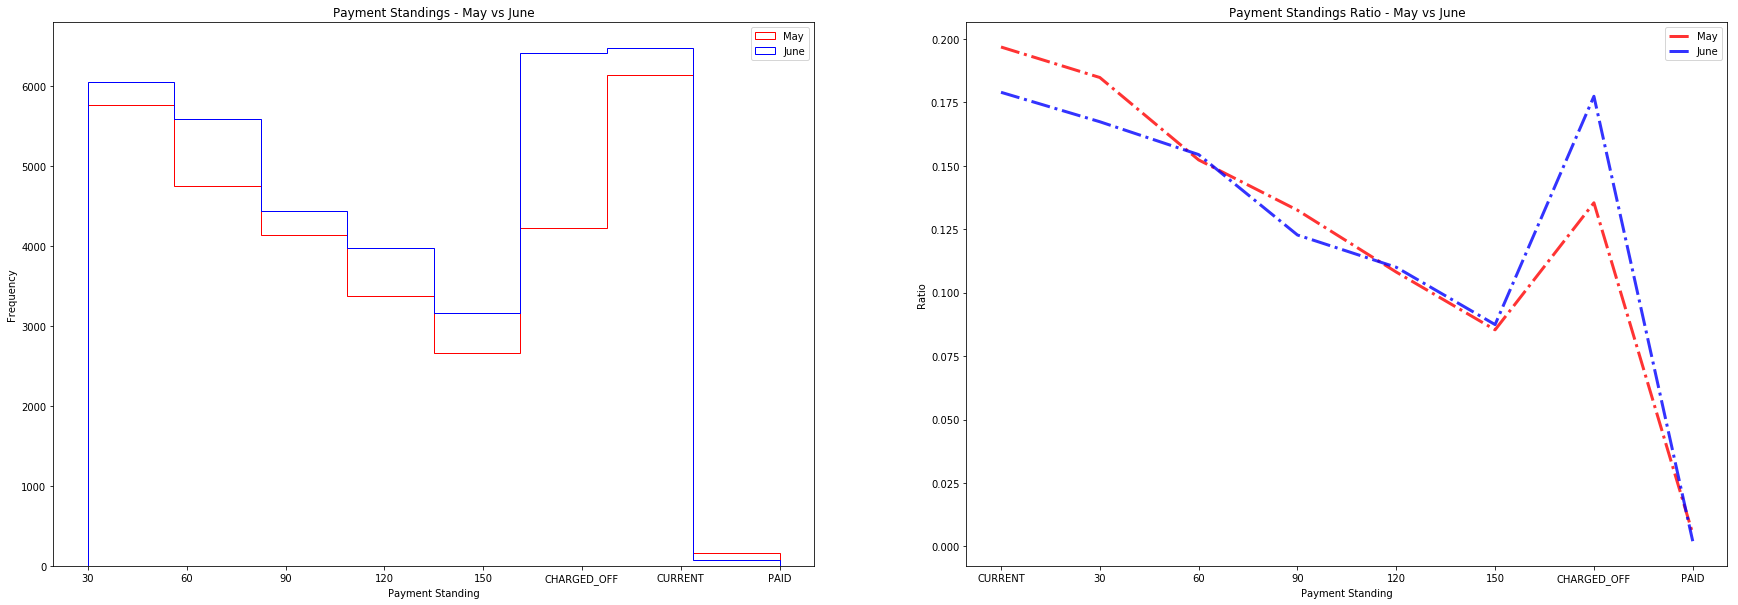

In [17]:
# plot the payment standings and payment standing ratios of May vs June
fig, ax = plt.subplots(1, 2, figsize=(30,10))

ax[0].hist(sorted(list(clean_as_of_may['actual_payment_standing'].values), key=lambda x: (int(x[1].split(None, 1)[0]) if x[1][:1].isdigit() else 999, x)), histtype='step', bins=8, color='r')
ax[0].hist(sorted(list(clean_as_of_june['actual_payment_standing'].values), key=lambda x: (int(x[1].split(None, 1)[0]) if x[1][:1].isdigit() else 999, x)), histtype='step', bins=8, color='b')


ax[1].plot(ratio_comparison['ratio_may'], lw=3, color='r', linestyle='-.', alpha=.8, label='May')
ax[1].plot(ratio_comparison['ratio_june'], lw=3, color='b', linestyle='-.', alpha=.8, label='June')

x_labels = list(ratio_comparison.index)

ax[0].set(title='Payment Standings - May vs June', xlabel='Payment Standing', ylabel='Frequency')
ax[0].legend(['May', 'June'])
ax[1].set(title='Payment Standings Ratio - May vs June', xlabel='Payment Standing', ylabel='Ratio')
ax[1].set_xticklabels(x_labels)

plt.legend()
plt.show()

In [18]:
# create copy of May table to include payment standing and outstanding principal in June
copy_as_of_may = clean_as_of_may.copy()
copy_as_of_may['payment_standing_june'] = 0
copy_as_of_may['principal_outstanding_june'] = 0

for i in copy_as_of_may.itertuples():
    account_id = i[1]
    loan_start = i[7]
    initial_amount = i[6]
    june_df = clean_as_of_june[(clean_as_of_june['loan_account_id'] == account_id) & (clean_as_of_june['loan_start_date'] == loan_start) & (clean_as_of_june['initial_loan_amount'] == initial_amount)]
    try:
        copy_as_of_may.loc[i[0], 'payment_standing_june'] = june_df['actual_payment_standing'].values[0]
        copy_as_of_may.loc[i[0], 'principal_outstanding_june'] = june_df['principal_outstanding'].values[0]
    except IndexError:
        copy_as_of_may.loc[i[0], 'payment_standing_june'] = 'MISSING'
        copy_as_of_may.loc[i[0], 'principal_outstanding_june'] = 0

In [19]:
#Observations

# 1936 loans are missing before cleaning data, no payment_standing status or outstanding principal as of 6/30/18
# 1639 loans are missing after cleaning the data

copy_as_of_may[copy_as_of_may['payment_standing_june'] == 'MISSING']['payment_standing_june'].value_counts()

MISSING    1639
Name: payment_standing_june, dtype: int64

In [20]:
# create empty transition matrix for number of loans and outstanding principal dollars
trans_mat_index = list(copy_as_of_may['payment_standing_june'].value_counts().index)
trans_mat_index.insert(0, 'CURRENT')
trans_mat_index.append(trans_mat_index.pop(1))
trans_mat_index.insert(6, trans_mat_index.pop())
trans_mat_index.append(trans_mat_index.pop(-2))

loans_trans_mat = pd.DataFrame(index=trans_mat_index[:-1], columns=trans_mat_index)

principal_trans_mat = pd.DataFrame(index=trans_mat_index[:-1], columns=trans_mat_index)

In [21]:
payment_standing_status = list(copy_as_of_may['actual_payment_standing'].value_counts().index)

for status in payment_standing_status:
    idx = copy_as_of_may[copy_as_of_may['actual_payment_standing'] == status]['payment_standing_june'].value_counts().index
    vals = copy_as_of_may[copy_as_of_may['actual_payment_standing'] == status]['payment_standing_june'].value_counts().values
    
    outstanding_idx = copy_as_of_may[copy_as_of_may['actual_payment_standing'] == status].groupby(['payment_standing_june'])['principal_outstanding_june'].sum().index
    outstanding_vals = copy_as_of_may[copy_as_of_may['actual_payment_standing'] == status].groupby(['payment_standing_june'])['principal_outstanding_june'].sum().values
    
    for i, inner_status in enumerate(idx):
        loans_trans_mat.loc[status, inner_status] = vals[i]
        
    for ix, inner_stat in enumerate(outstanding_idx):
        principal_trans_mat.loc[status, inner_stat] = outstanding_vals[ix]
        
loans_trans_mat.fillna(0, inplace=True)
principal_trans_mat.fillna(0, inplace=True)
principal_trans_mat.drop(columns=['MISSING'], inplace=True)

In [22]:
loans_trans_mat

,CURRENT,30,60,90,120,150,CHARGED_OFF,PAID,MISSING
CURRENT,0,5953,0,0,0,0,0,4,183
30,0,0,5563,0,0,0,0,6,196
60,0,0,0,4434,0,0,0,14,304
90,0,0,0,0,3979,0,0,7,148
120,0,0,0,0,0,3162,0,3,208
150,0,0,0,0,0,0,2354,13,296
CHARGED_OFF,0,0,0,0,0,0,4062,6,157
PAID,0,0,0,0,0,0,0,10,147


In [23]:
principal_trans_mat

,CURRENT,30,60,90,120,150,CHARGED_OFF,PAID
CURRENT,0,6048665,0,0,0,0,0,0
30,0,0,5262377,0,0,0,0,0
60,0,0,0,4112150,0,0,0,0
90,0,0,0,0,3310510,0,0,0
120,0,0,0,0,0,2595706,0,0
150,0,0,0,0,0,0,1920428,0
CHARGED_OFF,0,0,0,0,0,0,3153213,0
PAID,0,0,0,0,0,0,0,0


In [24]:
comparison_stats = pd.DataFrame(index=['May', 'June'], columns=['initial_amount', 'utilization', 'time_on_bureau', 'terms'])
comparison_stats.loc['May'] = [clean_loans_may['initial_loan_amount'].mean(), clean_loans_may['utilization'].mean(), clean_loans_may['time_on_bureau'].mean(), clean_loans_may['term'].mean()]
comparison_stats.loc['June'] = [clean_loans_june['initial_loan_amount'].mean(), clean_loans_june['utilization'].mean(), clean_loans_june['time_on_bureau'].mean(), clean_loans_june['term'].mean()]
comparison_stats

,initial_amount,utilization,time_on_bureau,terms
May,1120.54,0.499352,175.558,20.139
June,1081.61,0.497773,177.16,19.0995


## Summary & Findings

### Observations & Assumptions
- #### Obervations:
    - 3 loans have a "PAID" status but also have a negative principal_outstanding.
    - 575 loans have an initial loan amount of 0.
    - 905 loans had a higher principal_outstanding than initial loan amount. This includes the 575 loans from above as well. Normally, I would consider this to be in the ordinary course of business due to accumulating interest, however, most of them have a recalculated payment_standing of current so no interest should have accumulated yet. Additionally, some principal_outstanding numbers look extremely off.
    - 1936 loans from May are missing as of 6/30/18, no payment_standing status or outstanding principal.
    - 1639 were missing after cleaning the data.
- #### Assumptions
    - The 3 loans were dropped from the table for further analysis due to extremely small balances.
    - The 905 loans were also dropped from the table as these should be investigated separately and could possibly skew the analysis (although not likely).
    - According to my research, the industry average indicates loans 180 days past due and over will be considered "CHARGED_OFF".
    - Principal_outstanding balances of 0 will be considered "PAID".
    - Actual_days_past_due less than 30 days will be considered "CURRENT".
    - Missed payments scale:
        - "CURRENT": 0 missed = 0 to 29 days
        - "30": 1 missed= 30 to 59 days
        - "60": 2 missed = 60 to 89 days
        - "90": 3 missed = 90 to 119 days
        - "120": 4 missed = 120 to 149 days
        - "150": 5 missed= 150 to 179 days
        - "CHARGED_OFF": 6 missed = 180+ days
    - A payment_standing categorized as "PAID" or "CHARGED_OFF" are absorbing states, meaning once this is the status, the state will not change.

#### Q1. How many distinct loans are there in the dataset and what is the total initial loan amount vs total outstanding principal at the end of May vs June?
Before data cleanse:
- Number of distinct loans: 38,491
- May - Initial Loan Amount: 35,192,966, Outstanding Principal: 29,912,111
- June - Initial Loan Amount: 40,876,361, Outstanding Principal: 33,975,125

After data cleanse:
- Number of distinct loans: 37,689 
- May - Initial Loan Amount: 34,971,076, Outstanding Principal: 29,207,854
- June - Initial Loan Amount: 40,742,237, Outstanding Principal: 33,515,546

#### Q2. What is the distribution of payment standing at month end and do you observe any notable changes from May to June?
- The distribution of payment standings in May vs June were quite similar with the most notable change being a 51.9% increase in write-offs from May to June. Please see the 2 charts in response to Q4.
- The general trend shows more payments are being missed as payment standings (30 days - 150 days) all increased, ranging from 4% to 18.7%. Please see the ratio_comparison chart in response to Q4.
- Additionally, less loans weres paid off from May to June with a 52% decrease.
- One thing to keep in mind about these numbers is that we are comparing the accumulation of months prior to May (inclusive) and comparing them against June. It is not a month-to-month comparison.

#### Q3. Please produce a transition matrix from May to June by payment standing by 1) number of loans and 2) outstanding principal dollars. Transition matrix refers to a view of states you are in at t = 2 given that you were in state x at t = 1. For example, of the accounts and loans that were Current in May, how many are Current, 30 DPD, 60 DPD, etc. in June? You would repeat that process for all payment standings.

In [25]:
loans_trans_mat

,CURRENT,30,60,90,120,150,CHARGED_OFF,PAID,MISSING
CURRENT,0,5953,0,0,0,0,0,4,183
30,0,0,5563,0,0,0,0,6,196
60,0,0,0,4434,0,0,0,14,304
90,0,0,0,0,3979,0,0,7,148
120,0,0,0,0,0,3162,0,3,208
150,0,0,0,0,0,0,2354,13,296
CHARGED_OFF,0,0,0,0,0,0,4062,6,157
PAID,0,0,0,0,0,0,0,10,147


In [26]:
principal_trans_mat

,CURRENT,30,60,90,120,150,CHARGED_OFF,PAID
CURRENT,0,6048665,0,0,0,0,0,0
30,0,0,5262377,0,0,0,0,0
60,0,0,0,4112150,0,0,0,0
90,0,0,0,0,3310510,0,0,0
120,0,0,0,0,0,2595706,0,0
150,0,0,0,0,0,0,1920428,0
CHARGED_OFF,0,0,0,0,0,0,3153213,0
PAID,0,0,0,0,0,0,0,0


#### Q4. Let’s say our CEO John just came over to your desk and asked you how the profile and performance of our loan portfolio changed from May to June. Please show and explain the data that you would present to him. You can include charts if you’d like, but they are not required. Prior domain expertise in consumer lending risk management is not required for this role, so it’s more important that you fully articulate your analytical thought process—the why is more important than the what for this question.

I would calculate and compare the ratios of each payment standing status to total statuses for May and June to get an idea of what each month is comprised of. The key thing to look for here is a low percentage composition of delinquent or overdue debt. That is the ratio_may and ratio_june columns in the table below. Additionally, I would look at the percentage of change for each payment standing from May to June. This provides an idea of the size of the change relative to the previous month. This is the percent_change column in the table below. For a graphical representation, I have plotted the raw payment standings numbers for May and June on the left and the percentage of composition within each month. This allows one to quickly formulate an idea of the data. From the histogram on the left, we can see that missed payments increased across all statuses from May to June while the amount of loans paid off decreased. On the right, we observed a huge spike in loans written off.

I would also look at the comparison of initial loan amount vs outstanding principal for each month. Other ratios to consider include the number of loans obtained vs loans written off and initial loan amount vs amount written off. While this data might not present the entire picture, it should provide a very good idea of the performance of the loan portfolio.

In [27]:
ratio_comparison

,actual_payment_standing_may,ratio_may,actual_payment_standing_june,ratio_june,raw_change,percent_change
index,,,,,,
CURRENT,6140,0.196738,6473,0.178901,333,0.054235
30,5765,0.184722,6053,0.167293,288,0.049957
60,4752,0.152264,5585,0.154359,833,0.175295
90,4134,0.132462,4439,0.122685,305,0.073778
120,3373,0.108078,3979,0.109972,606,0.179662
150,2663,0.085328,3162,0.087392,499,0.187383
CHARGED_OFF,4225,0.135378,6416,0.177326,2191,0.518580
PAID,157,0.005031,75,0.002073,-82,-0.522293


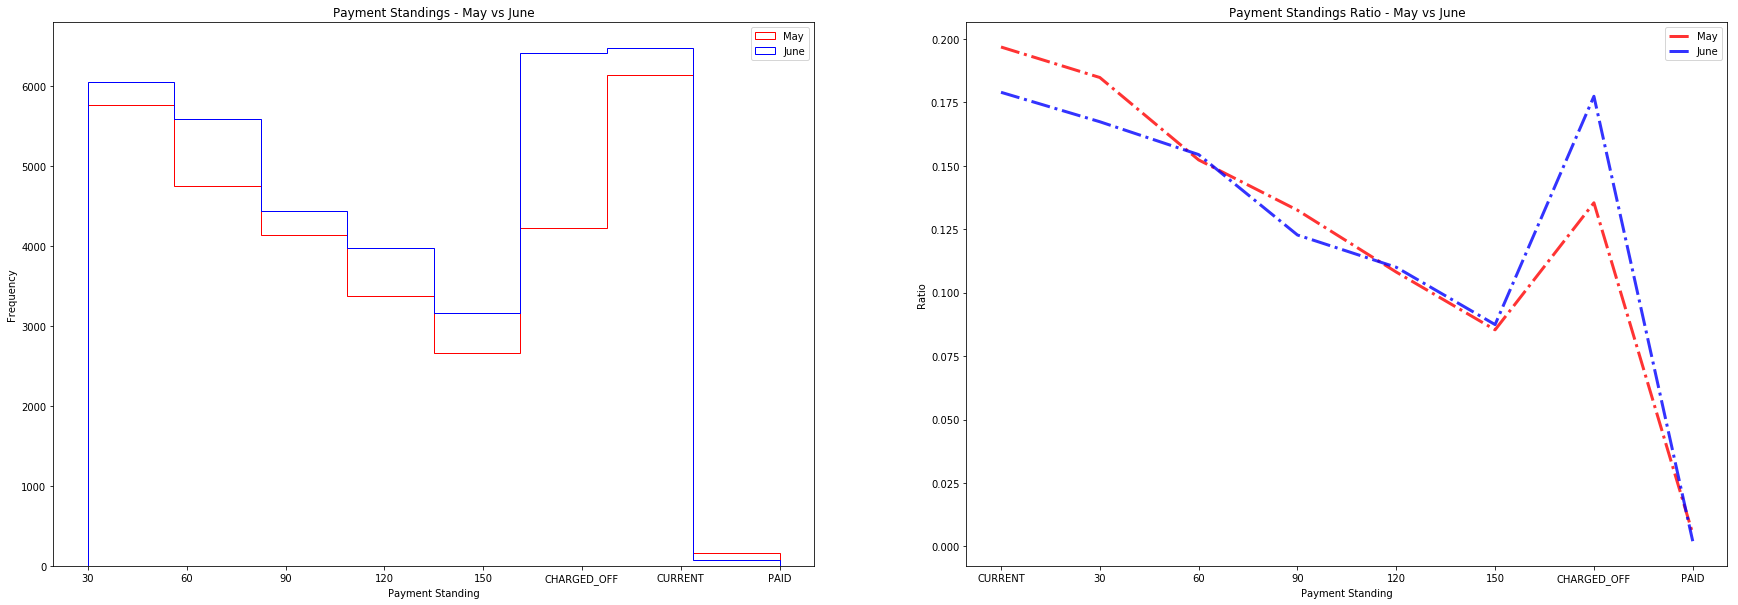

In [34]:
# plot the payment standings and payment standing ratios of May vs June
fig, ax = plt.subplots(1, 2, figsize=(30,10))

ax[0].hist(sorted(list(clean_as_of_may['actual_payment_standing'].values), key=lambda x: (int(x[1].split(None, 1)[0]) if x[1][:1].isdigit() else 999, x)), histtype='step', bins=8, color='r')
ax[0].hist(sorted(list(clean_as_of_june['actual_payment_standing'].values), key=lambda x: (int(x[1].split(None, 1)[0]) if x[1][:1].isdigit() else 999, x)), histtype='step', bins=8, color='b')


ax[1].plot(ratio_comparison['ratio_may'], lw=3, color='r', linestyle='-.', alpha=.8, label='May')
ax[1].plot(ratio_comparison['ratio_june'], lw=3, color='b', linestyle='-.', alpha=.8, label='June')

x_labels = list(ratio_comparison.index)

ax[0].set(title='Payment Standings - May vs June', xlabel='Payment Standing', ylabel='Frequency')
ax[0].legend(['May', 'June'])
ax[1].set(title='Payment Standings Ratio - May vs June', xlabel='Payment Standing', ylabel='Ratio')
ax[1].set_xticklabels(x_labels)

plt.legend()
plt.show()

#### Q5. (bonus question) What if anything are you able to find as explanatory factors to worsening payment standing?

The number of days past due and classification of payment standings were incorrectly calculated (possible system error). After recalculating and adjusting these 2 things, all of the loans written off, based on my assumption of days past due being 180 days or over, were initialized in 2017. The recalculation along with lumping these into the month of May exacerbated the payment standing from May to June.